In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [25]:
import geopandas as gpd

# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [26]:
sangdae_gdf = gdf[gdf['ADM_CD']=='25040700']

In [27]:
sangdae_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-27-7c461013df09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sangdae_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [28]:
sangdae_gdf['집계구번호'].astype(int)

,집계구번호
11,25040700020106
12,25040700020107
111,25040700010409
133,25040700010408
153,25040700010405
311,25040700020103
368,25040700020101
376,25040700020108
427,25040700020104
438,25040700020105


In [29]:
sdp_df = pd.read_excel('/content/drive/MyDrive/유성구 데이터/상대동인구수.xlsx')
sdp_df

,순위,항목,집계구번호,값,비율(%)
0,1,상대동_1,25040700010103,651,2.7
1,2,상대동_2,25040700030001,651,2.7
2,3,상대동_3,25040700020101,650,2.7
3,4,상대동_4,25040700020206,631,2.6
4,5,상대동_5,25040700010701,621,2.6
5,6,상대동_6,25040700010406,617,2.5
6,7,상대동_7,25040700010104,611,2.5
7,8,상대동_8,25040700010302,609,2.5
8,9,상대동_9,25040700010403,597,2.5
9,10,상대동_10,25040700010106,590,2.4


In [30]:
new_row = {'집계구번호': 25040700010005}
sdp_df = pd.concat([sdp_df, pd.DataFrame([new_row])], ignore_index=True)
sdp_df = sdp_df.fillna(0)  # 결측치를 0으로 채움
sdp_df

,순위,항목,집계구번호,값,비율(%)
0,1.0,상대동_1,25040700010103,651.0,2.7
1,2.0,상대동_2,25040700030001,651.0,2.7
2,3.0,상대동_3,25040700020101,650.0,2.7
3,4.0,상대동_4,25040700020206,631.0,2.6
4,5.0,상대동_5,25040700010701,621.0,2.6
5,6.0,상대동_6,25040700010406,617.0,2.5
6,7.0,상대동_7,25040700010104,611.0,2.5
7,8.0,상대동_8,25040700010302,609.0,2.5
8,9.0,상대동_9,25040700010403,597.0,2.5
9,10.0,상대동_10,25040700010106,590.0,2.4


In [31]:
new_row = {'집계구번호': 25040700020001}
sdp_df = pd.concat([sdp_df, pd.DataFrame([new_row])], ignore_index=True)
sdp_df = sdp_df.fillna(0)
sdp_df

,순위,항목,집계구번호,값,비율(%)
0,1.0,상대동_1,25040700010103,651.0,2.7
1,2.0,상대동_2,25040700030001,651.0,2.7
2,3.0,상대동_3,25040700020101,650.0,2.7
3,4.0,상대동_4,25040700020206,631.0,2.6
4,5.0,상대동_5,25040700010701,621.0,2.6
5,6.0,상대동_6,25040700010406,617.0,2.5
6,7.0,상대동_7,25040700010104,611.0,2.5
7,8.0,상대동_8,25040700010302,609.0,2.5
8,9.0,상대동_9,25040700010403,597.0,2.5
9,10.0,상대동_10,25040700010106,590.0,2.4


In [32]:
sdp_df = sdp_df.sort_values('집계구번호')
sdp_df

,순위,항목,집계구번호,값,비율(%)
40,41.0,상대동_41,25040700010001,397.0,1.6
21,22.0,상대동_22,25040700010002,541.0,2.2
39,40.0,상대동_40,25040700010003,402.0,1.7
46,47.0,상대동_47,25040700010004,339.0,1.4
47,0.0,0,25040700010005,0.0,0.0
32,33.0,상대동_33,25040700010101,475.0,2.0
18,19.0,상대동_19,25040700010102,551.0,2.3
0,1.0,상대동_1,25040700010103,651.0,2.7
6,7.0,상대동_7,25040700010104,611.0,2.5
14,15.0,상대동_15,25040700010105,576.0,2.4


In [33]:
sangdae_gdf = sangdae_gdf.sort_values('집계구번호')
sangdae_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
646,20230701,25040700,25040700010001,"POLYGON ((127.33953 36.34306, 127.33945 36.342..."
635,20230701,25040700,25040700010002,"POLYGON ((127.33443 36.34816, 127.33443 36.348..."
647,20230701,25040700,25040700010003,"POLYGON ((127.33712 36.34756, 127.33711 36.347..."
649,20230701,25040700,25040700010004,"POLYGON ((127.34030 36.34585, 127.34030 36.345..."
606,20230701,25040700,25040700010005,"POLYGON ((127.33532 36.34298, 127.33539 36.342..."
654,20230701,25040700,25040700010101,"POLYGON ((127.33800 36.34513, 127.33739 36.345..."
650,20230701,25040700,25040700010102,"POLYGON ((127.33768 36.34435, 127.33768 36.343..."
655,20230701,25040700,25040700010103,"POLYGON ((127.33738 36.34372, 127.33738 36.342..."
652,20230701,25040700,25040700010104,"POLYGON ((127.33661 36.34371, 127.33556 36.343..."
651,20230701,25040700,25040700010105,"POLYGON ((127.33660 36.34513, 127.33557 36.345..."


In [34]:
sangdae_gdf['집계구번호'] = sangdae_gdf['집계구번호'].astype(int)

In [35]:
# '집계구번호'를 기준으로 두 데이터프레임 병합
sangdae_new_gdf = sangdae_gdf.merge(sdp_df[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
sangdae_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040700,25040700010001,"POLYGON ((127.33953 36.34306, 127.33945 36.342...",397.0,1.6
1,20230701,25040700,25040700010002,"POLYGON ((127.33443 36.34816, 127.33443 36.348...",541.0,2.2
2,20230701,25040700,25040700010003,"POLYGON ((127.33712 36.34756, 127.33711 36.347...",402.0,1.7
3,20230701,25040700,25040700010004,"POLYGON ((127.34030 36.34585, 127.34030 36.345...",339.0,1.4
4,20230701,25040700,25040700010005,"POLYGON ((127.33532 36.34298, 127.33539 36.342...",0.0,0.0
5,20230701,25040700,25040700010101,"POLYGON ((127.33800 36.34513, 127.33739 36.345...",475.0,2.0
6,20230701,25040700,25040700010102,"POLYGON ((127.33768 36.34435, 127.33768 36.343...",551.0,2.3
7,20230701,25040700,25040700010103,"POLYGON ((127.33738 36.34372, 127.33738 36.342...",651.0,2.7
8,20230701,25040700,25040700010104,"POLYGON ((127.33661 36.34371, 127.33556 36.343...",611.0,2.5
9,20230701,25040700,25040700010105,"POLYGON ((127.33660 36.34513, 127.33557 36.345...",576.0,2.4


In [36]:
sangdae_new_gdf = sangdae_new_gdf.iloc[:-1]
sangdae_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040700,25040700010001,"POLYGON ((127.33953 36.34306, 127.33945 36.342...",397.0,1.6
1,20230701,25040700,25040700010002,"POLYGON ((127.33443 36.34816, 127.33443 36.348...",541.0,2.2
2,20230701,25040700,25040700010003,"POLYGON ((127.33712 36.34756, 127.33711 36.347...",402.0,1.7
3,20230701,25040700,25040700010004,"POLYGON ((127.34030 36.34585, 127.34030 36.345...",339.0,1.4
4,20230701,25040700,25040700010005,"POLYGON ((127.33532 36.34298, 127.33539 36.342...",0.0,0.0
5,20230701,25040700,25040700010101,"POLYGON ((127.33800 36.34513, 127.33739 36.345...",475.0,2.0
6,20230701,25040700,25040700010102,"POLYGON ((127.33768 36.34435, 127.33768 36.343...",551.0,2.3
7,20230701,25040700,25040700010103,"POLYGON ((127.33738 36.34372, 127.33738 36.342...",651.0,2.7
8,20230701,25040700,25040700010104,"POLYGON ((127.33661 36.34371, 127.33556 36.343...",611.0,2.5
9,20230701,25040700,25040700010105,"POLYGON ((127.33660 36.34513, 127.33557 36.345...",576.0,2.4


In [37]:
sangdae_new_gdf['일별쓰레기배출량'] = sangdae_new_gdf['값'] * 0.93
sangdae_new_gdf

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040700,25040700010001,"POLYGON ((127.33953 36.34306, 127.33945 36.342...",397.0,1.6,369.21
1,20230701,25040700,25040700010002,"POLYGON ((127.33443 36.34816, 127.33443 36.348...",541.0,2.2,503.13
2,20230701,25040700,25040700010003,"POLYGON ((127.33712 36.34756, 127.33711 36.347...",402.0,1.7,373.86
3,20230701,25040700,25040700010004,"POLYGON ((127.34030 36.34585, 127.34030 36.345...",339.0,1.4,315.27
4,20230701,25040700,25040700010005,"POLYGON ((127.33532 36.34298, 127.33539 36.342...",0.0,0.0,0.00
5,20230701,25040700,25040700010101,"POLYGON ((127.33800 36.34513, 127.33739 36.345...",475.0,2.0,441.75
6,20230701,25040700,25040700010102,"POLYGON ((127.33768 36.34435, 127.33768 36.343...",551.0,2.3,512.43
7,20230701,25040700,25040700010103,"POLYGON ((127.33738 36.34372, 127.33738 36.342...",651.0,2.7,605.43
8,20230701,25040700,25040700010104,"POLYGON ((127.33661 36.34371, 127.33556 36.343...",611.0,2.5,568.23
9,20230701,25040700,25040700010105,"POLYGON ((127.33660 36.34513, 127.33557 36.345...",576.0,2.4,535.68


In [38]:
sangdae_new_gdf.fillna(0, inplace=True)

<ipython-input-38-250e44973f84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sangdae_new_gdf.fillna(0, inplace=True)


In [39]:
sangdae_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040700,25040700010001,"POLYGON ((127.33953 36.34306, 127.33945 36.342...",397.0,1.6,369.21
1,20230701,25040700,25040700010002,"POLYGON ((127.33443 36.34816, 127.33443 36.348...",541.0,2.2,503.13
2,20230701,25040700,25040700010003,"POLYGON ((127.33712 36.34756, 127.33711 36.347...",402.0,1.7,373.86
3,20230701,25040700,25040700010004,"POLYGON ((127.34030 36.34585, 127.34030 36.345...",339.0,1.4,315.27
4,20230701,25040700,25040700010005,"POLYGON ((127.33532 36.34298, 127.33539 36.342...",0.0,0.0,0.00
5,20230701,25040700,25040700010101,"POLYGON ((127.33800 36.34513, 127.33739 36.345...",475.0,2.0,441.75
6,20230701,25040700,25040700010102,"POLYGON ((127.33768 36.34435, 127.33768 36.343...",551.0,2.3,512.43
7,20230701,25040700,25040700010103,"POLYGON ((127.33738 36.34372, 127.33738 36.342...",651.0,2.7,605.43
8,20230701,25040700,25040700010104,"POLYGON ((127.33661 36.34371, 127.33556 36.343...",611.0,2.5,568.23
9,20230701,25040700,25040700010105,"POLYGON ((127.33660 36.34513, 127.33557 36.345...",576.0,2.4,535.68


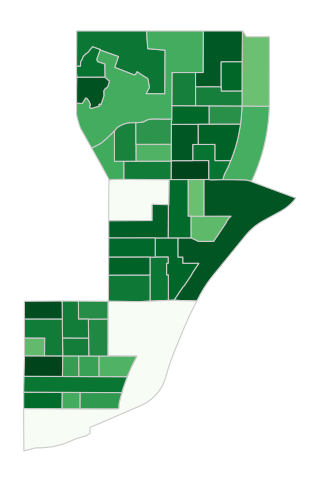

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

variable = '일별쓰레기배출량'

# 범위 설정
vmin, vmax = sangdae_new_gdf[variable].min(), sangdae_new_gdf[variable].max()

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
sangdae_new_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/sangdae_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()

In [41]:
# CSV 파일 경로
file_path_ = '/content/drive/MyDrive/유성구 데이터/유성구_공동주택_현황_위경도.csv'

# CSV 파일 읽기
apart_df = pd.read_csv(file_path_)

# 데이터프레임 확인
apart_df

,NAME,ADDRESS,_X,_Y
0,원자력연료사원아파트,대전광역시 유성구 도룡동 392-2,127.375911,36.384128
1,우성아파트,대전광역시 유성구 도룡동 383-3,127.381123,36.388177
2,연구원 현대아파트,대전광역시 유성구 도룡동 431-6,127.376720,36.383006
3,과기원교수아파트,대전광역시 유성구 도룡동 383-2,127.380333,36.388100
4,삼정하이츠아파트,대전광역시 유성구 구암동 600-2,127.331722,36.353420
...,...,...,...,...
244,호반써밋유성그랜드파크1단지,대전광역시 유성구 용산동 371-4,127.391040,36.416978
245,호반써밋유성그랜드파크3단지,대전광역시 유성구 용산동 391-2,127.395640,36.413690
246,원플러스(One Plus),대전광역시 유성구 봉명동 666-3,127.351980,36.358377
247,크레타하임,대전광역시 유성구 도룡동 385-21,127.379677,36.385815


In [42]:
# 'ADDRESS' 열에 '장대동'이 포함된 행만 필터링합니다.
sangdae_apart_df = apart_df[apart_df['ADDRESS'].str.contains('상대동')]

# 필터링된 데이터프레임을 새로운 변수에 저장합니다.
sangdae_apart_df

,NAME,ADDRESS,_X,_Y
32,목련아파트 1단지,대전광역시 유성구 상대동 445,127.331737,36.346315
34,목련아파트 2단지,대전광역시 유성구 상대동 444,127.331554,36.347597
45,평화이지,대전광역시 유성구 상대동 438-16,127.332545,36.347654
127,한라비발디,대전광역시 유성구 상대동 462,127.333694,36.344243
128,도안휴먼시아 4단지,대전광역시 유성구 상대동 465,127.337333,36.346978
138,트리풀시티9단지,대전광역시 유성구 상대동 487,127.334949,36.340518
170,트리풀시티 도안신도시5블럭,대전광역시 유성구 상대동 464,127.337206,36.344476
234,대전아이파크시티 2단지,대전광역시 유성구 상대동 580,127.330752,36.335058
236,대전아이파크시티 1단지,대전광역시 유성구 상대동 571,127.330533,36.337127


In [43]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=sangdae_new_gdf.to_json(),
    data=sangdae_new_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

for _, row in sangdae_apart_df.iterrows():
    folium.Circle(
        location=[row['_Y'], row['_X']],
        radius=100,  # 반경 설정 (미터 단위)
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        tooltip=f"주소: {row['ADDRESS']}"  # 마커에 표시될 툴팁
    ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/sangdae_block1.html')
m